In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_blobs,make_classification

sns.set_theme(style='whitegrid')

# Loss Function

We use **hinge loss** as a loss function *max(0,1-t)*
- It is equal to zeros when t>=1
- Its slope is equal to -1 if t<1 and 0 is t>0
- It is not deffrenciable at t = 0

 **Hinge loss for SVM:**

$$J(w) = \frac{1}{2} ||w||^{2} + C \sum_{i} max (0,[1-y^{(i)}(w^{T}x^{(i)}+b)])$$

The **second term** is the **hinge loss** and it penalizes for missclassification

# Soft SVM

In [ ]:
class SoftSVM():
    def __init__(self,C):
        self.support_vectors = None
        self.C = C
        self.w = None
        self.b = None
        self.X = None
        self.y = None
        
        #n is the number of data points
        self.n = None
        
        #d is the number of dimensions
        self.d = None
        
    def __decesion_function(self,X):
        return X@self.w + self.b
        
    def __cost(self,margin):
        return (1/2)*(np.transpose(self.w)@self.w) + self.C(np.sum(np.maximum(0,1-margin)))
        
    def __margin(self,X,y):
        y_pred = self.__decesion_function(X)
            
        return y*(y_pred)
        
        
    def fit(self,X,y,lr=0.001,epochs=500):
        self.n,self.d = X.shape
        self.w = np.random.randn(self.d)
        self.b = 0
            
        loss_array =[]
            
        self.X = X
        self.y = y
        for _ in range(epochs):
            margin = self.__margin(self.X,self.y)
                
            loss = self.__cost(margin)
                
            loss_array.append(loss)
                
            missclassified_points = np.where(margin<1)[0]
                
            d_w = self.w - self.C*y[missclassified_points].dot(X[missclassified_points])
            self.w -= lr*d_w
                
            d_b = -self.C*np.sum(y[missclassified_points])
            self.b -= lr*d_b

                
        self.support_vectors = np.where(self.__margin(X,y)<=1)[0]
            
            
    def predict(self,X):
        return np.sign(self.__decesion_function(X))
        
    def score(self,X,y):
        P = self.predict(X)
        return np.mean(P)
        
    def plot_decesion_boundary(self,X,y):
            plt.scatter(self.X[:,0],self.X[:,1],c = self.y,marker='o',s=100,cmap='autumn')
            ax = plt.gca()
            xlim = ax.get_xlim()
            ylim = ax.get_ylim()
            
            xx = np.linspace(xlim[0],xlim[1],30)
            yy = np.linspace(ylim[0],ylim[1],30)
            
            YY,XX = np.meshgrid(yy,xx)
            
            xy = np.vstack([XX.ravel(),YY.ravel()]).T
            Z = self.__decesion_function(xy).reshae(XX.shape)
            
            
            
            ax.contour(XX,YY,Z,colors=['g','k','g'],levels=[-1,0,1],linestyles=['--','-','--'],linewidths = [2.0,2.0,2.0])
            
            
            ax.scatter(self.X[:,0][self.support_vectors],self.X[:,1][self.support_vectors],s=250,linewidth=1,
                      facecoloe='none',edgecolor='k')
            
            plt.xlabel("x1")
            plt.ylabel('x2')
            
            plt.show()

# Genearating data

In [9]:
X,y = make_blobs(n_samples=60,n_features=2,centers=[[0,0],[6,6]],cluster_std=1,random_state=12)
y = np.where(y==0,-1,1)

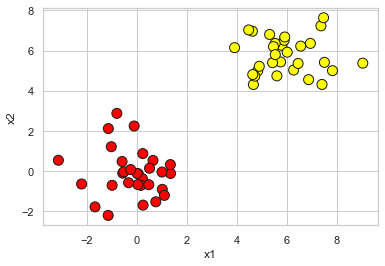

In [10]:
plt.scatter(X[:,0],X[:,1],c=y,cmap='autumn',s=100,edgecolors='k',marker='o')
plt.xlabel("x1")
plt.ylabel('x2')
plt.show()

In [11]:
w = np.random.randn(X.shape[-1])

In [12]:
b = np.random.randint(10)

In [13]:
def __decesion_function(X):
    return X@w +b

In [14]:
df = __decesion_function(X)

In [15]:
def __margin(df,y):
    return np.transpose(y)@df

In [16]:
margin = __margin(df,y)

In [17]:
def __cost(margin,C,w):
    return (1/2)*(np.transpose(w)@w) + C*np.maximum(0,(1-margin))

In [18]:
__cost(margin=margin,C=1,w=w)

0.018012063061216572

In [41]:
class SoftSVM():
    def __init__(self,C):
        self.C = C
        self.w = None
        self.b = None
        self.X = None
        self.y = None
        self.support_vectors = None
        self.n_samples = None
        self.n_features = None
        
        
    def __decesion_function(self,X):
        return X@(self.w) + self.b
    
    def __margin(self,X,y):
        return np.transpose(y)@self.__decesion_function(X)
    
    def __cost(self,margin):
        return (1/2)*(np.transpose(w)@w) + self.C*(np.sum(np.maximum(0,1-margin)))
    
    def fit(self,X,y,lr=0.001,epochs=50):
        self.w = np.random.randn(X.shape[-1])
        self.b = np.random.randn()
        
        
        self.X = X
        self.y = y
        
        loss_array =[]
        
        for _ in range(epochs):
            margin = self.__margin(self.X,self.y)
            loss = self.__cost(margin)
            
            loss_array.append(loss)
            
            missclassified_points= np.where(margin<1)[0]
            
            d_w = self.w + self.C*(self.y[missclassified_points].dot(self.X[missclassified_points]))
            self.w -= lr*d_w
            
            d_b = -self.C*(np.sum(self.y[missclassified_points]))
            self.b -= lr*d_b
        self.support_vectors = np.where(self.__margin(self.X,self.y)<=1)[0]
            
        return self.support_vectors
    
    def predict(self,X):
        return np.sign(self.__decesion_function(X))
    
    def confusion_matrix(self,y_test,y_pred):
        y_t = np.where(y==-1,0,1)
        y_p = np.where(y==-1,0,1)
        
        n = len(np.unique(y_t))
        
        cm = np.zeros((n,n))
        
        for t,p in zip(y_t,y_p):
            cm[t,p] += 1
        return cm
        
    def score(self,X,y):
        P = self.predict(X)
        return np.mean(P)
        
    def plot_decesion_boundary(self,X,y):
            plt.scatter(self.X[:,0],self.X[:,1],c = self.y,marker='o',s=100,cmap='autumn')
            ax = plt.gca()
            xlim = ax.get_xlim()
            ylim = ax.get_ylim()
            
            xx = np.linspace(xlim[0],xlim[1],30)
            yy = np.linspace(ylim[0],ylim[1],30)
            
            YY,XX = np.meshgrid(yy,xx)
            
            xy = np.vstack([XX.ravel(),YY.ravel()]).T
            Z = self.__decesion_function(xy).reshape(XX.shape)
            
            
            
            ax.contour(XX,YY,Z,colors=['g','k','g'],levels=[-1,0,1],linestyles=['--','-','--'],linewidths = [2.0,2.0,2.0])
            
            
            ax.scatter(self.X[:,0][self.support_vectors],self.X[:,1][self.support_vectors],s=250,linewidth=1,
                      facecolor='none',edgecolor='k')
            
            plt.xlabel("x1")
            plt.ylabel('x2')
            
            plt.show()

In [42]:
svm = SoftSVM(C=1)

In [43]:
svm.fit(X,y)

array([], dtype=int64)

In [22]:
svm.predict(X)

array([ 1.,  1.,  1.,  1.,  1.,  1., -1., -1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1., -1.,  1., -1., -1., -1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,
       -1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  1., -1.,  1.,  1.,  1.,
       -1.,  1., -1.,  1.,  1.,  1.,  1.,  1.])

In [23]:
y

array([-1,  1, -1,  1, -1, -1, -1, -1, -1,  1,  1,  1,  1, -1,  1, -1,  1,
        1, -1, -1, -1, -1,  1,  1,  1,  1,  1, -1,  1, -1, -1, -1,  1,  1,
        1,  1,  1,  1, -1, -1, -1,  1,  1,  1, -1, -1,  1,  1, -1, -1, -1,
       -1, -1,  1, -1,  1, -1,  1,  1, -1])

In [24]:
svm.confusion_matrix(y,svm.predict(X))

array([[30.,  0.],
       [ 0., 30.]])

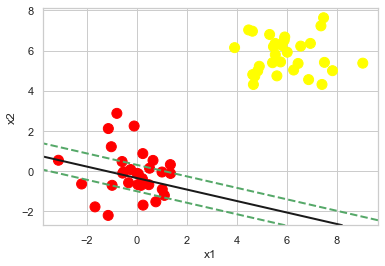

In [25]:
svm.plot_decesion_boundary(X,y)

In [44]:
class fit_SoftSVM():
    def __init__(self,C=500):
        self.C = C
        self.w = None
        self.b = None
        self.sv = None
        
    def __decesion_function(self,X):
        return X@self.w + self.b
    
    def __margin(self,X,y):
        return y*self.__decesion_function(X)
    
    def __cost(self,margin):
        return (1/2)*(np.transpose(self.w)@self.w) + self.C*(np.sum(np.maximum(0,(1-margin))))
    
    def fit(self,X,y,lr=0.001,epochs=100):
        self.w = np.zeros(X.shape[-1])
        self.b = 0
        
        for _ in range(epochs):
            
            margin = self.__margin(X,y)
            
            
            
            missclassified_points = np.where(margin <1)[0] 
            d_w = self.w - self.C*(y[missclassified_points].dot(X[missclassified_points]))
            self.w -= lr*d_w
            
            d_b = -self.C*np.sum(y[missclassified_points])
            self.b -= lr*d_b
            
            
        self.sv = np.where(self.__margin(X,y)<=1)[0]
        
        return self.w,self.b
            
            

In [45]:
svm = fit_SoftSVM()

In [47]:
features = np.array([[3,1],[3,-1],[6,1],[6,-1],[1,0],[0,1],[0,-1],[-1,0]])
labels = np.array([1,1,1,1,-1,-1,-1,-1])

In [48]:
svm.fit(features,labels)

(array([4.05518716, 0.        ]), -5.5)